<a href="https://colab.research.google.com/github/eunicebalicanta/credit-card-fraud-detection/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

## Overview

This project aims to identify credit card fraud using machine learning models. The dataset consists of transaction features, and the objective is to categorize transactions as either fraudulent or legitimate. Multiple machine learning models, including Random Forest, XGBoost, and Logistic Regression, will be utilized to detect fraudulent transactions and create visualizations.

## Machine Learning Models:
- Random Forest Classifier: An ensemble method that combines multiple decision trees to improve classification accuracy
- XGBoost Classifier: A gradient boosting technique that builds models sequentially to correct errors made by previous models
- Logistic Regression: A statistical method used for binary classification problems

Cited from the UC Irvine Machine Learning Repository, the three models were identified to produce the most accurate and precise predictions, compared to Support Vector and Neural Network classifications for a similar dataset.

## Step-by-step Process

1. Installation
2. Data Preparation
3. Model Training and Evaluation
4. Visualization


## Installation

Ensure you have the following Python packages installed:

- `numpy`
- `pandas`
- `matplotlib`
- `seaborn`
- `scikit-learn`
- `xgboost`

Sources:
- https://archive.ics.uci.edu/dataset/27/credit+approval
- https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


## 1. Installation

In [2]:
# Install all libraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install xgboost

print("All libraries installed")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 6.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [3]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import xgboost as xgb
from xgboost import XGBClassifier

print("All libraries imported")

All libraries imported


## 2. Data Preparation

In [4]:
# Load dataset
credit_card = pd.read_csv('creditcard.csv')
credit_card.dropna(inplace=True)
credit_card

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269306,163622.0,-0.569514,0.798664,2.168568,-0.362375,-0.112081,-0.336251,0.563493,-0.059881,0.525917,...,-0.220851,-0.337648,-0.302725,-0.090639,0.293862,-0.664496,0.188393,-0.082037,1.00,0.0
269307,163622.0,0.508904,0.649664,0.973601,1.054893,-0.406338,-0.343784,0.018162,-0.061663,0.301350,...,0.071984,0.468318,0.265016,0.028976,-1.791758,-0.690011,0.418209,0.315569,1.00,0.0
269308,163623.0,1.969238,-0.386206,-0.422364,0.151434,-0.550257,-0.269741,-0.632417,0.143496,1.233122,...,-0.093816,-0.204126,0.319091,-0.481361,-0.401275,-0.914828,0.052024,-0.043066,1.00,0.0
269309,163623.0,2.143922,-0.681218,-1.328920,-0.786185,-0.457053,-1.277814,-0.080907,-0.473492,-0.662790,...,0.067409,0.222521,0.153918,0.031472,-0.000407,-0.283674,-0.035735,-0.055022,47.55,0.0


## 3. Model Training and Evaluation

For this project, we'll use the Random Forest Classification, XG Boost Classification, and Logistic Regression machine learning models to determine which indexes are identified as a fraudulent transaction.

In [5]:
# Identify features and target variable
X = credit_card.drop(['Amount', 'Class'], axis=1)
y = credit_card['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [6]:
# Train the models
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

log_reg_model = LogisticRegression(solver='liblinear', random_state=42)
log_reg_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [8]:
# Compute and display metrics for model evaluation
def print_metrics(y_true, y_pred, model_name):
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Normal', 'Anomaly']))
    print("\n")

print_metrics(y_test, y_pred_xgb, 'XGBoost')
print_metrics(y_test, y_pred_log_reg, 'Logistic Regression')
print_metrics(y_test, y_pred_rf, 'Random Forest')

Metrics for XGBoost:
Accuracy: 0.9996
Precision: 0.9360
Recall: 0.8298
F1 Score: 0.8797
ROC-AUC: 0.9148

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     80653
     Anomaly       0.94      0.83      0.88       141

    accuracy                           1.00     80794
   macro avg       0.97      0.91      0.94     80794
weighted avg       1.00      1.00      1.00     80794



Metrics for Logistic Regression:
Accuracy: 0.9992
Precision: 0.8750
Recall: 0.6454
F1 Score: 0.7429
ROC-AUC: 0.8226

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     80653
     Anomaly       0.88      0.65      0.74       141

    accuracy                           1.00     80794
   macro avg       0.94      0.82      0.87     80794
weighted avg       1.00      1.00      1.00     80794



Metrics for Random Forest:
Accuracy: 0.9996
Precision: 0.9500
Recall: 0.80

Interpreted from these metrics, all three models (XGBoost, Logistic Regression, and Random Forest) perform exceptionally well with high accuracy, precision, recall, and F1 scores. The ROC-AUC score further reinforces their effectiveness in distinguishing between fraudulent and non-fraudulent transactions.

It's important to note that while precision and F1 scores are perfect, the recall of 81.82% shows that there's room for improvement in detecting all fraudulent transactions. This trade-off implies that reducing false positives can sometimes increase false negatives.



## 4. Visualization

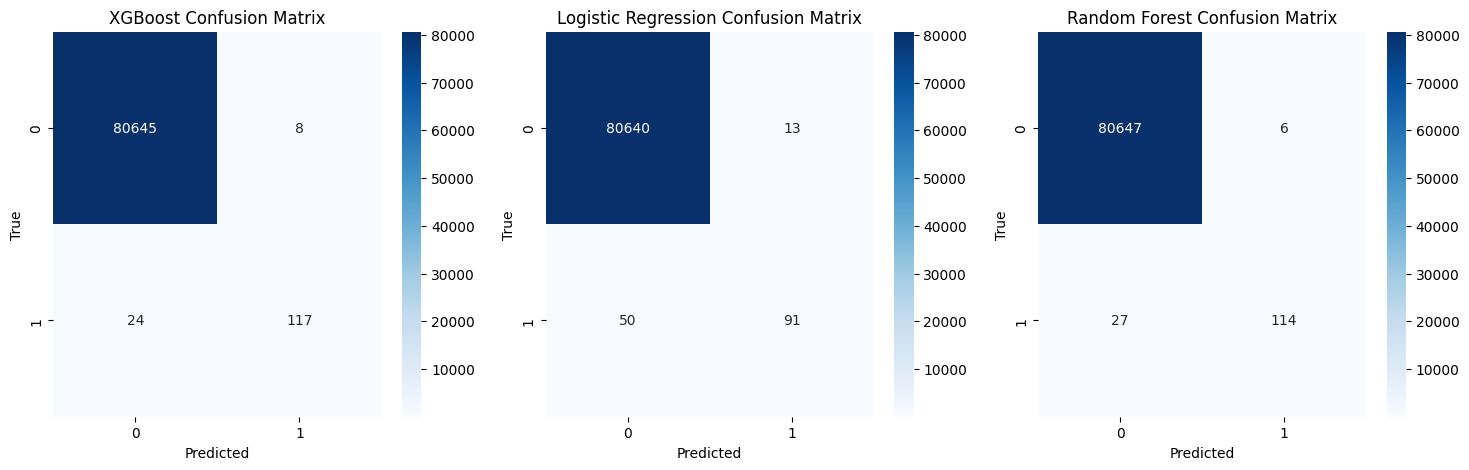

In [9]:
# Create confusion matrices
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_rf = confusion_matrix(y_test, y_pred_rf)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# XGBoost
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('XGBoost Confusion Matrix')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('True')

# Logistic Regression
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('Logistic Regression Confusion Matrix')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('True')

# Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axs[2])
axs[2].set_title('Random Forest Confusion Matrix')
axs[2].set_xlabel('Predicted')
axs[2].set_ylabel('True')

plt.show()

<Figure size 1200x800 with 0 Axes>

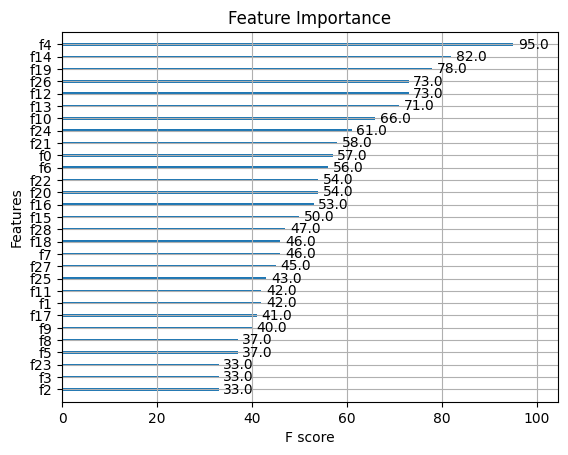

In [10]:
# Plot feature importances
plt.figure(figsize=(12, 8))
xgb.plot_importance(xgb_model, importance_type='weight')
plt.title('Feature Importance')
plt.show()

The Receiving Operator Curve plots the True Positive Rate (recall) against the False Positive Rate at various threshold settings. Models with ROC curves at the top-left corner of the chart indicate high TPR and low FPR, further emphasizing the validity of the predictions.

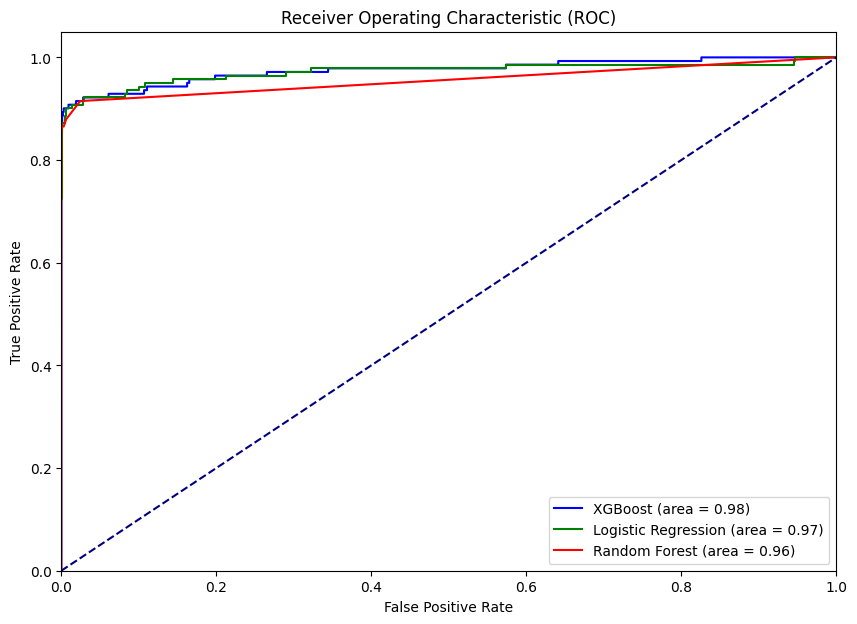

In [11]:
# Plot ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg_model.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 7))
plt.plot(fpr_xgb, tpr_xgb, color='blue', label='XGBoost (area = %0.2f)' % auc(fpr_xgb, tpr_xgb))
plt.plot(fpr_log_reg, tpr_log_reg, color='green', label='Logistic Regression (area = %0.2f)' % auc(fpr_log_reg, tpr_log_reg))
plt.plot(fpr_rf, tpr_rf, color='red', label='Random Forest (area = %0.2f)' % auc(fpr_rf, tpr_rf))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [12]:
# Get anomaly probabilities
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_prob_log_reg = log_reg_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
threshold = 0.5

# Identify outliers and extract detected rows from test data
outliers_xgb = y_prob_xgb > threshold
outliers_log_reg = y_prob_log_reg > threshold
outliers_rf = y_prob_rf > threshold
outliers_X_test_xgb = X_test[outliers_xgb]
outliers_X_test_log_reg = X_test[outliers_log_reg]
outliers_X_test_rf = X_test[outliers_rf]
outliers_y_test_xgb = y_test[outliers_xgb]
outliers_y_test_log_reg = y_test[outliers_log_reg]
outliers_y_test_rf = y_test[outliers_rf]
indices_outliers_xgb = np.where(outliers_xgb)[0]
indices_outliers_log_reg = np.where(outliers_log_reg)[0]
indices_outliers_rf = np.where(outliers_rf)[0]

In [20]:
# Retrieve rows corresponding to outliers
outliers_rows_xgb = X_test[indices_outliers_xgb]
outliers_rows_log_reg = X_test[indices_outliers_log_reg]
outliers_rows_rf = X_test[indices_outliers_rf]

# Print indices and first five sample rows
print(f"Indices of outliers detected by XGBoost: {indices_outliers_xgb}")
print("\n")
print("Sample outliers detected by XGBoost:")
print(outliers_rows_xgb[:5])
print("\n")
print(f"Indices of outliers detected by Logistic Regression: {indices_outliers_log_reg}")
print("\n")
print("Sample outliers detected by Logistic Regression:")
print(outliers_rows_log_reg[:5])
print("\n")
print(f"Indices of outliers detected by Random Forest: {indices_outliers_rf}")
print("\n")
print("Sample outliers detected by Random Forest:")
print(outliers_rows_rf[:5])

Indices of outliers detected by XGBoost: [  908  2182  2563  3603  3806  3926  4044  4701  6993  7973  8365  8465
  8881 10088 13212 13791 14279 15490 15586 15860 16879 16903 17966 18159
 18289 18292 18781 18944 20671 20960 21462 22211 22498 23386 23626 25181
 26158 27484 30495 30570 31802 32262 32904 34172 34483 34656 34939 35920
 36584 37224 37385 37820 38570 38969 39042 39329 39431 41586 41664 42382
 43057 44527 45017 45489 46445 47644 48120 48144 48210 48948 49116 49204
 49258 49901 49903 49919 49934 50285 50784 51286 51671 51749 51848 52456
 54218 54737 54824 55388 55523 56107 57039 59228 59636 60462 61307 62947
 63154 63713 64196 64510 64553 64604 64667 65059 66281 66335 67797 67818
 68506 69053 69697 71053 71634 72193 72926 74360 74553 75258 76307 76674
 77108 77954 79212 79870 80136]


Sample outliers detected by XGBoost:
[[ -1.07108775  -2.32672574   2.03202234  -3.0557644    2.54593961
   -1.8101462   -0.82821026  -4.54373296   0.37598484  -2.19602581
   -5.24476078   3.48485

In [21]:
# Identify common instances in all models
combined_indices = np.concatenate([indices_outliers_xgb, indices_outliers_log_reg, indices_outliers_rf])
unique_indices = sorted(set(combined_indices))

print("Outlier indices classified by all three models:")
print(unique_indices)

Outlier indices classified by all three models:
[908, 1337, 2112, 2182, 2563, 3603, 3806, 3926, 4044, 4701, 5937, 6266, 6306, 6993, 7973, 8365, 8465, 8881, 10088, 13212, 13791, 14279, 14401, 15490, 15586, 15860, 16879, 16903, 17966, 18159, 18289, 18292, 18781, 18944, 19301, 20671, 20960, 21462, 22147, 22211, 22498, 22886, 23386, 23626, 25181, 26158, 27484, 30495, 30570, 31802, 32262, 32904, 33031, 34172, 34483, 34656, 34939, 35920, 36584, 37224, 37385, 37820, 38462, 38570, 38969, 39042, 39329, 39428, 39431, 41586, 41664, 42382, 43057, 44527, 45017, 45489, 46445, 47644, 48120, 48144, 48210, 48948, 49116, 49204, 49258, 49901, 49903, 49919, 49934, 50285, 50784, 51286, 51671, 51749, 51848, 52456, 54218, 54737, 54824, 55388, 55523, 56107, 56856, 57039, 59228, 59636, 60462, 61307, 62947, 63154, 63713, 64196, 64510, 64553, 64604, 64667, 65059, 66281, 66335, 67797, 67818, 68506, 69053, 69697, 71053, 71634, 72193, 72926, 74360, 74553, 75258, 76307, 76674, 77108, 77127, 77411, 77954, 79212, 7987

<ipython-input-22-ef9ef05456ae>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test[~outliers_xgb, 0], X_test[~outliers_xgb, 1], c=palette[0], label='Normal')
<ipython-input-22-ef9ef05456ae>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test[outliers_xgb, 0], X_test[outliers_xgb, 1], c=palette[5], label='Anomalies')
<ipython-input-22-ef9ef05456ae>:22: UserWarning: *c* argument looks like a s

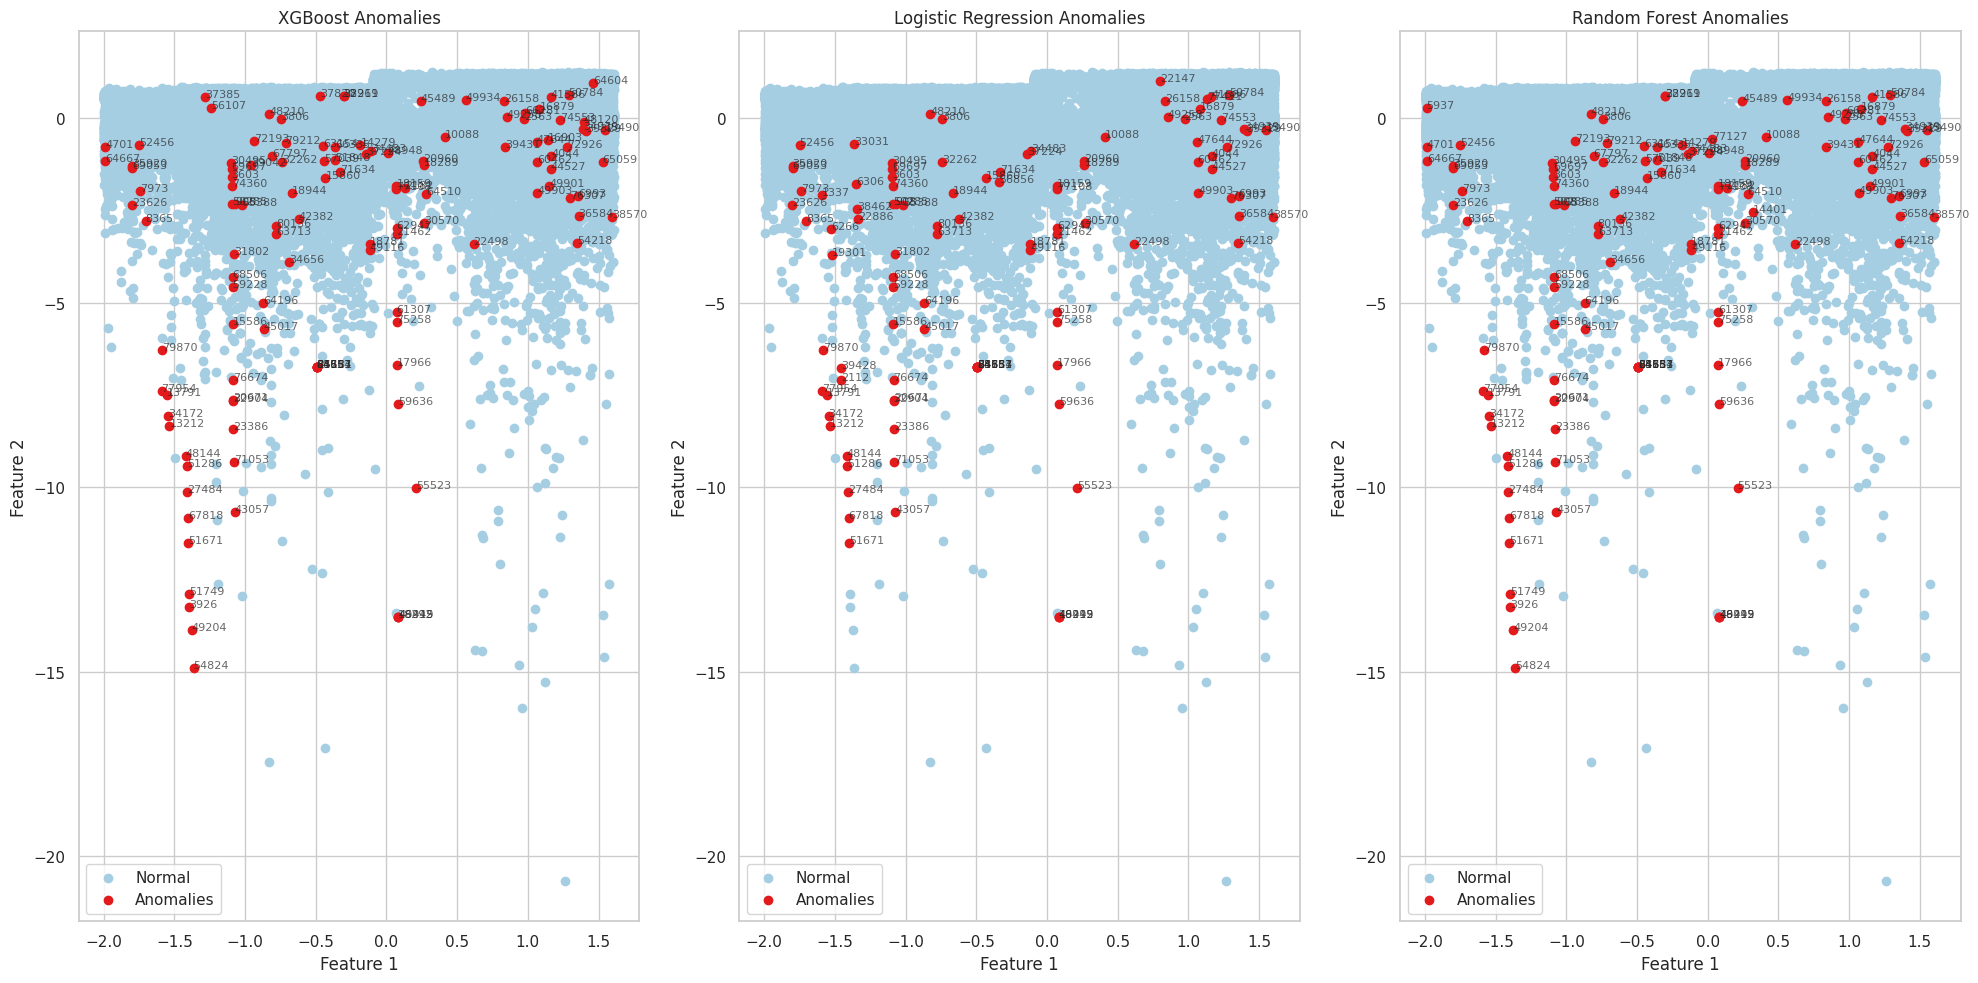

In [22]:
# Create 2D Scatterplots visualizing normal and anomaly-detected instances
sns.set(style="whitegrid")
palette = sns.color_palette("Paired")

plt.figure(figsize=(20, 10))

# XGBoost
plt.subplot(1, 3, 1)
plt.scatter(X_test[~outliers_xgb, 0], X_test[~outliers_xgb, 1], c=palette[0], label='Normal')
plt.scatter(X_test[outliers_xgb, 0], X_test[outliers_xgb, 1], c=palette[5], label='Anomalies')

for i in np.where(outliers_xgb)[0]:
    plt.annotate(i, (X_test[i, 0], X_test[i, 1]), fontsize=8, alpha=0.7)

plt.title('XGBoost Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Logistic Regression
plt.subplot(1, 3, 2)
plt.scatter(X_test[~outliers_log_reg, 0], X_test[~outliers_log_reg, 1], c=palette[0], label='Normal')
plt.scatter(X_test[outliers_log_reg, 0], X_test[outliers_log_reg, 1], c=palette[5], label='Anomalies')

for i in np.where(outliers_log_reg)[0]:
    plt.annotate(i, (X_test[i, 0], X_test[i, 1]), fontsize=8, alpha=0.7)

plt.title('Logistic Regression Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Random Forest Scatter
plt.subplot(1, 3, 3)
plt.scatter(X_test[~outliers_rf, 0], X_test[~outliers_rf, 1], c=palette[0], label='Normal')
plt.scatter(X_test[outliers_rf, 0], X_test[outliers_rf, 1], c=palette[5], label='Anomalies')

for i in np.where(outliers_rf)[0]:
    plt.annotate(i, (X_test[i, 0], X_test[i, 1]), fontsize=8, alpha=0.7)

plt.title('Random Forest Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
# Apply PCA to reduce dimensions to 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_test)

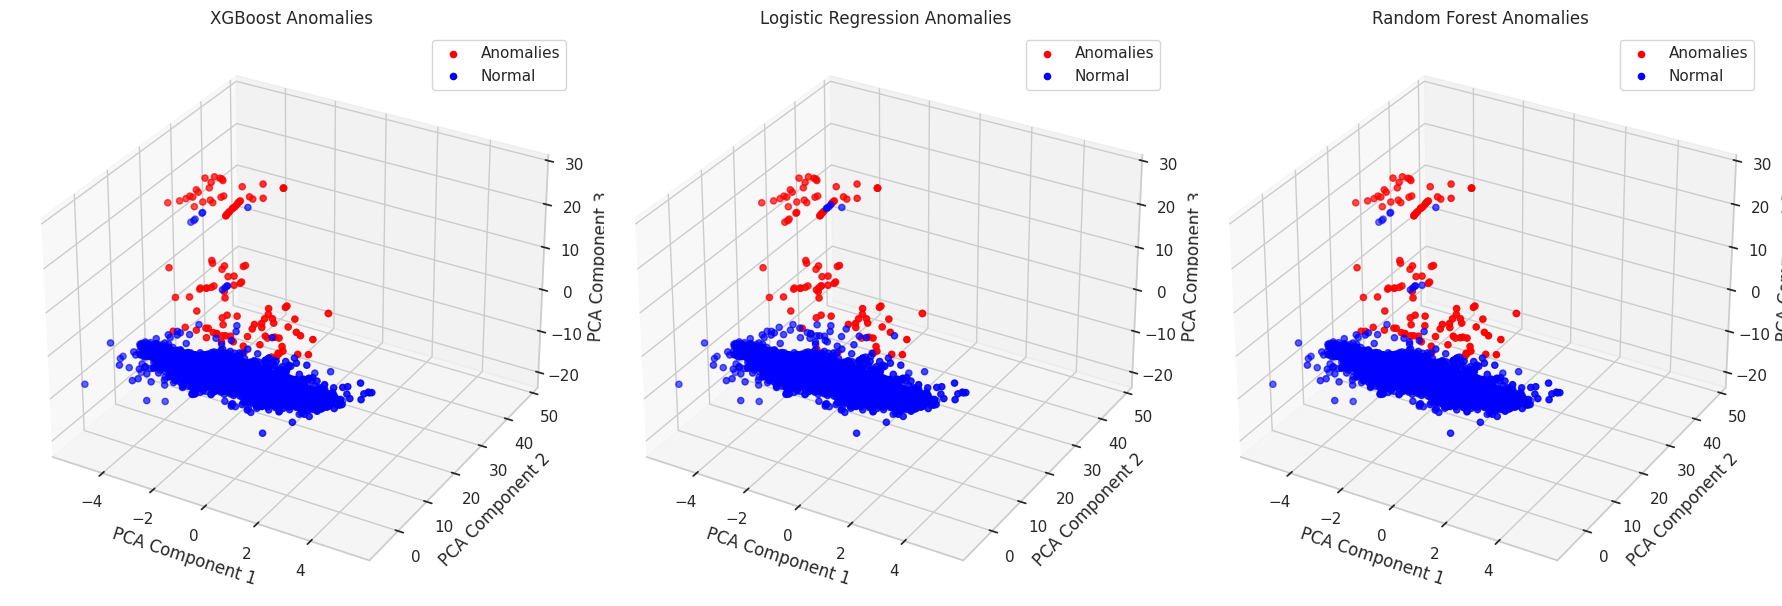

In [24]:
# Create 3D Scatterplots visualizing normal and anomaly-detected instances
fig = plt.figure(figsize=(18, 6))

# XGBoost
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X_pca[outliers_xgb, 0], X_pca[outliers_xgb, 1], X_pca[outliers_xgb, 2], c='red', label='Anomalies')
ax1.scatter(X_pca[~outliers_xgb, 0], X_pca[~outliers_xgb, 1], X_pca[~outliers_xgb, 2], c='blue', label='Normal')
ax1.set_title('XGBoost Anomalies')
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_zlabel('PCA Component 3')
ax1.legend()

# Logistic Regression
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X_pca[outliers_log_reg, 0], X_pca[outliers_log_reg, 1], X_pca[outliers_log_reg, 2], c='red', label='Anomalies')
ax2.scatter(X_pca[~outliers_log_reg, 0], X_pca[~outliers_log_reg, 1], X_pca[~outliers_log_reg, 2], c='blue', label='Normal')
ax2.set_title('Logistic Regression Anomalies')
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax2.set_zlabel('PCA Component 3')
ax2.legend()

# Random Forest
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(X_pca[outliers_rf, 0], X_pca[outliers_rf, 1], X_pca[outliers_rf, 2], c='red', label='Anomalies')
ax3.scatter(X_pca[~outliers_rf, 0], X_pca[~outliers_rf, 1], X_pca[~outliers_rf, 2], c='blue', label='Normal')
ax3.set_title('Random Forest Anomalies')
ax3.set_xlabel('PCA Component 1')
ax3.set_ylabel('PCA Component 2')
ax3.set_zlabel('PCA Component 3')
ax3.legend()

plt.tight_layout()
plt.show()